# DATA5711 Bayesian Computational Statistics

# Introduction to Python

**Semester 1, 8 February 2021**

**Objectives:**
* Learn to use numpy and pandas
* Learn to implement linear regression
* Learn to implement gradient descent 
* Learn to solve the coefficients in linear regression model analytically
* Learn how to enclose a model into a class file
* Learn how to visualise the dataset


Lecturers and Tutors: Simon Luo and Vincent Chin

# Importing Python Library

**Numpy**

NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

**Pandas**

Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

**matplotlib**

Matplotlib is a plotting library for the Python.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

We use the pandas to read in comma-separated values (csv) file.

In [4]:
os.chdir("/Users/megannguyen/Desktop/DATA 5711/datasets/input")
X = pd.read_csv("input_training_features.csv")
Y = pd.read_csv("input_training_labels.csv")

Lets have a look at what the dataset looks like:

In [21]:
X

array([[0.18, 0.89],
       [1.  , 0.26],
       [0.92, 0.11],
       [0.07, 0.37],
       [0.85, 0.16],
       [0.99, 0.41],
       [0.87, 0.47]])

In [6]:
Y

,label 1
0,109.85
1,155.72
2,137.66
3,76.17
4,139.75
5,162.60
6,151.77


Lets use a 3D plot to visualise the dataset. We have two of the dimensions representing the features (also known as atrributes or covariates) and 1 represents the labels (also known as the dependent variable) that we want to predict.

In [17]:
# TODO Make a 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y,marker='o')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Label 1')

TypeError: unhashable type: 'slice'

We could also look at the 2-Dimensional projections

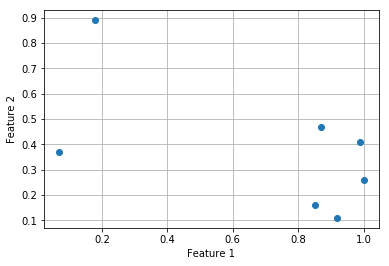

In [20]:
#TODO Make 2D Plots
plt.plot(X[:,0],X[:,1],'o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()

# Implementing Linear Regression by Calculating the Coefficients Analytically

The forward model of linear regression with two features takes the following form:
\begin{equation}
    y_i = \beta_0 + x_{i1} \beta_1 + x_{i2} \beta_2
\end{equation}

In matrix form it is:
\begin{equation}
    y_{i} = \left[\begin{matrix}1, x_{i1}, x_{i2}\end{matrix}\right] \left[\begin{matrix}\beta_0\\ \beta_1\\ \beta_2\end{matrix}\right] = \mathbf{x} \boldsymbol{\beta}
\end{equation}

We can then extend this to matrix form to include all observations.
\begin{equation}
    Y = \left[\begin{matrix}1, x_{i1}, x_{i2}\\ \vdots \\ 1, x_{N1}, x_{N2}\end{matrix}\right] \left[\begin{matrix}\beta_0\\ \beta_1\\ \beta_2\end{matrix}\right] = \mathbf{X} \boldsymbol{\beta}
\end{equation}

First we would like to centre the dataset to have zero mean and then compute the intercept $\beta_0$.

In [22]:
# Compute mean
X_mean = np.mean(X,axis=0)
beta_0 = np.mean(Y)

# Zero center the feature and labels
X_R = X - X_mean
Y_R = Y - beta_0

The loss function $J \left( \boldsymbol{\beta} \right)$ (also called cost function or objective function) for linear regression is:
\begin{equation}
    J \left( \boldsymbol{\beta} \right) = \left\Vert \mathbf{Y} - \mathbf{X} \boldsymbol{\beta} \right\Vert^2
\end{equation}
The co-efficients in linear regression can be computed analytically by taking the first derivative and solving analytically:

\begin{equation}
    \frac{\partial}{\partial \beta} \left( \mathbf{Y} - \mathbf{X} \boldsymbol{\beta} \right)^{\top} \left( \mathbf{Y} - \mathbf{X} \boldsymbol{\beta} \right) = -2 \mathbf{X}^{\top} \left( \mathbf{Y} - \mathbf{X} \boldsymbol{\beta} \right) = 0 \\
    \mathbf{X}^{\top} \mathbf{Y} = \mathbf{X}^{\top} \mathbf{X} \boldsymbol{\beta}
\end{equation}
The final analytical equation for the co-efficient is:

\begin{equation}
    \boldsymbol{\beta} = \left( \mathbf{X}^{\top} \mathbf{X} \right)^{-1} \mathbf{X}^{\top} \mathbf{Y}
\end{equation}

We can now analytically calculate the coefficients for linear regression (here we are only computing $\beta_1$ and $\beta_2$ because we have already computed $\beta_0$ above. We can compute $\beta_0$ in this way by appending a 1 in front of $X$).

In [23]:
# calculate the parameters beta
beta = np.linalg.inv(X_R.T @ X_R) @ X_R.T @ Y_R

Create mesh to visualise hyper plane of our regression

In [24]:
X0_range = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 10)
X1_range = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 10)

XX_mesh, YY_mesh = np.meshgrid(X0_range,X1_range)
model_input_hyperplane = np.array([XX_mesh.flatten(), YY_mesh.flatten()]).T

Compute hyperplane

In [10]:
hyperplane_label = (model_input_hyperplane - X_mean) @ beta + beta_0

Plot hyperplane

Text(0.5, 0, 'Label 1')

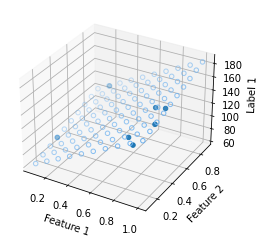

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XX_mesh.flatten(), YY_mesh.flatten(), hyperplane_label, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.scatter(X[:,0], X[:,1], Y, marker='o')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Label 1')

**Import Testing Data**

Import test dataset to make predictions

In [25]:
X_testing = pd.read_csv("input_testing_features.csv")

Make prediction on the testing set

In [27]:
#TODO
os.chdir("/Users/megannguyen/Desktop/DATA 5711/datasets/output")
Y_output = pd.read_csv("output_labels.csv")

Print the output of the regression model.

In [14]:
print(Y_output)

[[105.21455835]
 [142.67095131]
 [132.93605469]
 [129.70175405]]


Plot the predictions

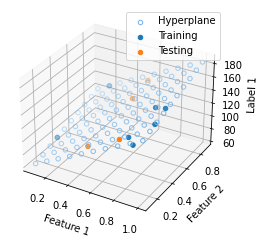

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XX_mesh.flatten(), YY_mesh.flatten(), hyperplane_label, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.scatter(X[:,0], X[:,1], Y, marker='o')
ax.scatter(X_testing[:,0], X_testing[:,1], Y_output, marker='o')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Label 1')

plt.legend(['Hyperplane', 'Training', 'Testing'])

# Implementing Linear Regression by Calculating the Coefficients with Gradient Descent

The loss function for linear regression is,

\begin{equation}
    J \left(m, b \right) = \frac{1}{2N} \sum_{i=1}^{N} \left( y_{i} - \left( mx_{i} + b \right) \right)^2
\end{equation}

Now taking the derivatives with respect to the model parameters to obtain the gradients, we have:
\begin{equation}
    \frac{\partial}{\partial m} J \left(m, b \right) = - \frac{1}{N} \sum_{i=1}^{N} x_{i} \left( y_{i} - \left( mx_{i} + b \right) \right) \\
    \frac{\partial}{\partial b} J \left(m, b \right) = - \frac{1}{N} \sum_{i=1}^{N} \left( y_{i} - \left( mx_{i} + b \right) \right)
\end{equation}

In [30]:
m = np.random.rand(X.shape[1], 1)
b = np.random.rand()

iterations = 10000
learning_rate = 0.1

# Number of elements in X
n = float(len(X))
X_R = X - np.mean(X,axis=0)


# Performing Gradient Descent
for i in range(iterations): 
    # TODO
    
    Y_pred = (X_R @ m)+b
    D_m = (-1/n)*np.expand_dims(np.sum(X * (Y - Y_pred), axis=0),1)
    D_b =  (-1/n) *np.sum(Y-Y_pred)
    m= m - (learning_rate * D_m)
    b= b - (learning_rate * D_b)

ValueError: Shape of passed values is (2, 7), indices imply (1, 7)

In [17]:
Y_pred

array([[109.79254295],
       [156.11966757],
       [140.85116001],
       [ 72.85028014],
       [136.70424144],
       [162.7887486 ],
       [154.3726757 ]])

In [18]:
Y_pred_testset = ...

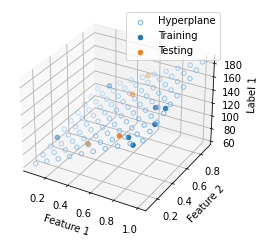

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XX_mesh.flatten(), YY_mesh.flatten(), hyperplane_label, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.scatter(X[:,0], X[:,1], Y, marker='o')
ax.scatter(X_testing[:,0], X_testing[:,1], Y_pred_testset, marker='o')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Label 1')

plt.legend(['Hyperplane', 'Training', 'Testing'])

# Enclosing the model in a class

When you have finished prototyping your code. It is always good practice to enclose your model in a class so that that it is easy to be used again in the future for other applications.

In [20]:
import numpy as np

class linear_regression:
    """
    This is a basic implementation of linear regression
    """
    def __init__(self, gradient_descent=False, iterations = 10000, learning_rate = 0.1):
        """
        This function initialises the parameters of the model.
        
        Parameters:
        -----------
        gradient_descent: bool
            If True : Use gradient descent to estimate the parameters of the model
            If False: Solves for the parameters of the model analytically.
        iterations: int
            For gradient descent only. The number of iterations used in gradient descent.
        learning_rate: float
            For gradient descent only. The learning rate for gradient descent.

        Returns:
        --------
        None
        """
        # Store model parameters
        self.gradient_descent = gradient_descent
        self.iterations = iterations
        self.learning_rate = learning_rate

    def _solve_analytically(self, X, Y):
        """
        Solve for the parameters of the model analytically.
        
        Parameters:
        -----------
        X: numpy.ndarray
            The input features (or covariates) represented as a NxD array,
            where N is the number of samples and D is the number of features.
        Y: numpy.ndarray
            The labels (or dependent variables) represented as NxD array,
            where N is the number of samples and D is the number of labels.

        Returns:
        --------
        None
        """
        #TODO

    def _gradient_descent(self, X, Y):
        """
        Estimate the coefficients in linear regression using gradient descent.

        Parameters:
        -----------
        X: numpy.ndarray
            The input features (or covariates) represented as a NxD array,
            where N is the number of samples and D is the number of features.
        Y: numpy.ndarray
            The labels (or dependent variables) represented as NxD array,
            where N is the number of samples and D is the number of labels.

        Returns:
        --------
        None
        """
        # TODO
    def fit(self, X, Y):
        """
        Estimates the coefficients for linear regression.

        Parameters:
        -----------
        X: numpy.ndarray
            The input features (or covariates) represented as a NxD array,
            where N is the number of samples and D is the number of features.
        Y: numpy.ndarray
            The labels (or dependent variables) represented as NxD array,
            where N is the number of samples and D is the number of labels.

        Returns:
        --------
        None
        """
        if self.gradient_descent:
            self._gradient_descent(X, Y)
        else:
            self._solve_analytically(X, Y)

    def predict(self, X_test):
        """
        Use this after you have called the fit function.
        
        Parameters:
        -----------
        X_test: numpy.ndarray
            The testing dataset represented as a NxD array,
            where N is the number of samples and D is the number of features.
            
        Returns:
        --------
        y_pred: numpy.ndarray
            The predicted labels of the model represented as NxD array,
            where N is the number of samples and D is the number of labels.
        
        """
        # TODO
        return y_pred

if __name__ == "__main__":
    # Create model to estimate the parameters of the model analytically
    lr_model_a = linear_regression()
    lr_model_a.fit(X,Y)
    lr_model_a.predict(X_testing)
    
    # Create model to estimate the parameters of the model using gradient descent
    lr_model_gd = linear_regression(gradient_descent=True)
    lr_model_gd.fit(X,Y)
    lr_model_gd.predict(X_testing)
    
    # Check if the model two models have the same output
    np.testing.assert_almost_equal(lr_model_a.predict(X_testing), lr_model_gd.predict(X_testing))

# Applying the model to Geology Dataset

You can find the Geology dataset at:

https://ecat.ga.gov.au/geonetwork/srv/eng/catalog.search#/metadata/63759

In the rock property dataset, you are to split the dataset into 70% for training and 30% for the test set.
Then we would like to use the sample mass and density to predict the porosity of each of the rocks.

In [ ]:
# Read in the rock property dataset
rock_properties_df = ...

In [ ]:
# Select sample_mass and density_db as a feature
X_rock = ...

In [ ]:
# Select our output as porosity_a


In [ ]:
# Split into training and testing set

X_rock_training = ...
Y_rock_training = ...

X_rock_testing = ...
Y_rock_testing = ...


**Apply Linear Regression Model**

In [1]:
# TODO

**Visualise Output**

In [ ]:
X0_range = np.linspace(np.min(X_rock_training[:,0]), np.max(X_rock_training[:,0]), 10)
X1_range = np.linspace(np.min(X_rock_training[:,1]), np.max(X_rock_training[:,1]), 10)

XX_mesh, YY_mesh = np.meshgrid(X0_range,X1_range)
model_input_hyperplane = np.array([XX_mesh.flatten(), YY_mesh.flatten()]).T

In [ ]:
hyperplane_label = lr_rock.predict(model_input_hyperplane)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(XX_mesh.flatten(), YY_mesh.flatten(), hyperplane_label, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
ax.scatter(X_rock_training[:,0], X_rock_training[:,1], Y_rock_training, marker='o')
ax.scatter(X_rock_testing[:,0], X_rock_testing[:,1], Y_rock_testing, marker='o')

ax.set_xlabel('Mass')
ax.set_ylabel('Density')
ax.set_zlabel('Porosity')